# Alumnos:

* ### Vázquez Martínez Fredin Alberto

# Aplicación: StudyBuddy
Aplicación que con base en tus notas de clase y documentos relacionados te ayuda a estudiar para pasar tu examen final.

## Desarrollo

### Input:
Se va a considerar un agente con langchain capaz de leer notas, la entrada esperada serán Pdfs, posteriormente va captar información.


### Output:
La salida esperada será un resumen de puntos más importantes de tus notas.

En caso que el usuario incluya alguna de los siguientes puntos, se va esperar resultados adicionales:

1. Palabras clave o temas clave: además del resumen general, el agente será capaz de poder enfocar el resumen de las notas para ese tema solicitado por el usuario. 

2. Preguntas: el agente tendrá la capacidad de responder a preguntas en base a las notas dadas.

In [1]:
## Instalando las dependencias ##
!pip install langchain_ollama
!pip install langchain_community
!pip install pymupdf
!pip install langchain_text_splitters
!pip install langchain_chroma
!pip install langgraph

  Using cached langchain_ollama-0.3.3-py3-none-any.whl.metadata (1.5 kB)
  Using cached ollama-0.4.8-py3-none-any.whl.metadata (4.7 kB)
  Using cached langchain_core-0.3.61-py3-none-any.whl.metadata (5.8 kB)
  Using cached langsmith-0.3.42-py3-none-any.whl.metadata (15 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached zstandard-0.23.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
Using cached langchain_ollama-0.3.3-py3-none-any.whl (21 kB)
Using cached langchain_core-0.3.61-py3-none-any.whl (438 kB)
Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
Using cached langsmith-0.3.42-py3-none-any.whl (360 kB)
Using cached ollama-0.4.8-py3-none-any.whl (13 kB)
Using cached packaging-24.2-py3-none-any.whl (65 kB)
Usin

In [2]:
## Cargando las librerias ##
import os 
from rich import print as rprint
from rich.rule import Rule
from langchain_ollama.chat_models import ChatOllama
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_ollama.embeddings import OllamaEmbeddings
from langchain_chroma import Chroma
from langchain_core.prompts import ChatPromptTemplate
from IPython.display import Markdown, display
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


# loaders
from langchain_community.document_loaders import WebBaseLoader, PyMuPDFLoader, UnstructuredPDFLoader

# langGraph
from langgraph.graph import MessagesState, StateGraph
from IPython.display import Image, display
from langgraph.graph import START, StateGraph

USER_AGENT environment variable not set, consider setting it to identify your requests.


### Cargando el modelo y definiendo loaders para recuperación de información

In [3]:
## Cargando el modelo ##
MODEL = "llama3.2"
llm = ChatOllama(model=MODEL,base_url="http://172.29.128.1:11434")

## Definiendo loaders ##

name_dir = 'pdfs_notes'
documents = [
    doc
    for file in os.listdir(name_dir)
    if file.endswith(".pdf")
    for doc in PyMuPDFLoader(os.path.join(name_dir, file)).load()
]

rprint(f"Total documents {len(documents)}")
for i, doc in enumerate(documents[:3], start=1):
    rprint(Rule(f"Doc {i}"))
    rprint(doc.page_content[:300])

Total documents 12

────────────────────────────────────────────────────── Doc 1 ──────────────────────────────────────────────────────

Tema 2. 
 
Aprendizaje 
 
Concepto: convertir experiencia en habilidad o conocimiento. 
Entonces, un aprendizaje automático es programas a las computadoras para que aprendan 
de la entrada dada sin instrucciones explícitas. La entrada es la experiencia y la salida el 
conocimiento. 
Marco de aprendi

────────────────────────────────────────────────────── Doc 2 ──────────────────────────────────────────────────────

También se suele usar la notación de P: 
 
P,J indica que el error es sobre la distribución P y la función de etiquetado f.  R es llamado 
como error de generalización, riesgo, error verdadero de h. 
El objetivo es encontrar una función h tal que se minimice el error R.  
 
Que es encontrar el argum

────────────────────────────────────────────────────── Doc 3 ──────────────────────────────────────────────────────

Es importante tanto el tamaño de la muestra como la complejidad de las familias de 
hipótesis. Si tenemos una muestra pequeña, y si se toma una familia muy compleja 
entonces habrá mala generalización y se tendrá un sobreajuste. Esto significa que el 
modelo se ajusta mucho a las particularidades de

In [4]:
## Separando la informacion de los documentos para una mejor recuperación de la información ##
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200, add_start_index=True)
all_splits = text_splitter.split_documents(documents)

rprint(f"Splits {len(all_splits)}")
for i, split in enumerate(all_splits[30:33], start=1):
    rprint(Rule(f"split #{i}"))
    rprint(split)

Splits 33

──────────────────────────────────────────────────── split #1 ─────────────────────────────────────────────────────

Document(
    metadata={
        'producer': 'Skia/PDF m138 Google Docs Renderer',
        'creator': '',
        'creationdate': '',
        'source': 'pdfs_notes/Guia_MachineLearning.pdf',
        'file_path': 'pdfs_notes/Guia_MachineLearning.pdf',
        'total_pages': 12,
        'format': 'PDF 1.4',
        'title': 'GuiaPersonal',
        'author': '',
        'subject': '',
        'keywords': '',
        'moddate': '',
        'trapped': '',
        'modDate': '',
        'creationDate': '',
        'page': 10,
        'start_index': 1647
    },
    page_content='Propiedades de la función sigmoide \n1.\u200b Acotada de 0 a 1 \n2.\u200b Simétrica o sea que 1 -
sigmoide(a) = sigmoide(-a) \n3.\u200b Es diferenciable = sigmoide(a) * ( 1 - sigmoide(a))  \nLa tarea es predecir 
la probabilidad de que x pertenezca a una clase y: p(y|x) \nPara saber si pertenece a C1, entonces se escribe como 
p(C1 | x), para C2 es p(C2 | x) = 1 \n- p(C1 | x)'
)

──────────────────────────────────────────────────── split #2 ─────────────────────────────────────────────────────

Document(
    metadata={
        'producer': 'Skia/PDF m138 Google Docs Renderer',
        'creator': '',
        'creationdate': '',
        'source': 'pdfs_notes/Guia_MachineLearning.pdf',
        'file_path': 'pdfs_notes/Guia_MachineLearning.pdf',
        'total_pages': 12,
        'format': 'PDF 1.4',
        'title': 'GuiaPersonal',
        'author': '',
        'subject': '',
        'keywords': '',
        'moddate': '',
        'trapped': '',
        'modDate': '',
        'creationDate': '',
        'page': 11,
        'start_index': 0
    },
    page_content='La decisión sobre qué clase aplicar a un ejemplo x, está dado por un umbral \n1 Si P(y=1 | x) > 
0.5 \n0 en otro caso \nFunción logit: \nEsta nos dice que el logaritmo de la razón de probabilidades p(C1 | x)/p(C2
| x) es \nequivalente a la expresión de regresión lineal. \nSirve como vinculo entre la probabilidad y la expresión
de regresión lineal. Oscila entre finito \npositivo y negativo, da un criterio adecuado para el cual se realiza la 
regresión lineal y el \nlogit se convierte en probabilidades. \nFunción odds \nResulta después de exponenciar ambos
lados de la función logit. La cual nos dice que la \nprobabilidad de que la variable dependiente sea igual a un 
caso, es equivalente a la función \nexponencial de la regresión lineal. Dada una combinación lineal x de los 
predictores. \nFunción de costo \nNo se usa ECM porque crea complicaciones al encontrar un mínimo global con 
descenso de \ngradiente. Como los resultados son entre 0 a 1, es dificil hacer un seguimiento de errores'
)

──────────────────────────────────────────────────── split #3 ─────────────────────────────────────────────────────

Document(
    metadata={
        'producer': 'Skia/PDF m138 Google Docs Renderer',
        'creator': '',
        'creationdate': '',
        'source': 'pdfs_notes/Guia_MachineLearning.pdf',
        'file_path': 'pdfs_notes/Guia_MachineLearning.pdf',
        'total_pages': 12,
        'format': 'PDF 1.4',
        'title': 'GuiaPersonal',
        'author': '',
        'subject': '',
        'keywords': '',
        'moddate': '',
        'trapped': '',
        'modDate': '',
        'creationDate': '',
        'page': 11,
        'start_index': 782
    },
    page_content='Función de costo \nNo se usa ECM porque crea complicaciones al encontrar un mínimo global con 
descenso de \ngradiente. Como los resultados son entre 0 a 1, es dificil hacer un seguimiento de errores \npor los 
valores flotantes. \nLa función a minimizar es la función de perdida log loss.'
)

### Cargando modelo de embeddings

Los embeddings serán usados para poder hacer búsqueda en los textos que fueron dados, usando similitud de coseno. Estos embeddings serán usados para crear la base de datos de vectores, de esta manera podemos agregar esos vectores de la información que tenemos para poder hacer queries.

In [5]:
embeddings = OllamaEmbeddings(model="nomic-embed-text:latest",
    base_url="http://172.29.128.1:11434")
vector_store = Chroma(
    # Nombramos nuestra colección
    collection_name="vector_BD",
    embedding_function=embeddings,
    persist_directory="./documents_vector_db"
)

# Indexando nuestra información
ids = vector_store.add_documents(documents=all_splits)
rprint(ids[:10])

[
    'a7caf975-4751-48e1-b1be-13af62c1807a',
    '11a8a9c4-f7fb-4b17-a249-9bcaae2c6731',
    '9abe296c-c097-4315-968a-5845d63ee34a',
    'c8be3c35-82e3-45c1-8b50-f6da3a662819',
    'ad820d04-ad5b-4c2c-ba67-e3b775789637',
    'b348d84e-b7b4-4791-ad2b-39cb61bf4433',
    '1e736708-2775-4e99-bfd4-19fd52a29b21',
    'e753724e-ea8e-4de9-b9ef-0a3b02082514',
    '4ec3a61d-d4f5-4fab-ab7c-022f55b27648',
    '7db9b173-7c8a-46fe-af4b-b12f79bfc9f0'
]

Ya con esta base de datos de vectores de nuestra información, es posible hacer consultas de similitud, con similitud coseno, para encontrar splits de los documentos cargados, que tengan mayor similitud con nuestra búsqueda.

In [6]:
# Búsqueda de término
results = await vector_store.asimilarity_search("Sobreajuste")
rprint(results[0])

# Búsqueda de pregunta
embedding = embeddings.embed_query("por qué se produce el sobreajuste?")
results = vector_store.similarity_search_by_vector(embedding)
rprint(f"Results={len(results)}")
for i, result in enumerate(results):
    rprint(Rule(f"Result #{i}"))
    rprint(result.page_content)

Document(
    id='00107a90-08a9-49a4-91f5-5b49ef0e6894',
    metadata={
        'subject': '',
        'file_path': 'pdfs_notes/Guia_MachineLearning.pdf',
        'producer': 'Skia/PDF m138 Google Docs Renderer',
        'creationDate': '',
        'title': 'GuiaPersonal',
        'source': 'pdfs_notes/Guia_MachineLearning.pdf',
        'moddate': '',
        'author': '',
        'modDate': '',
        'total_pages': 12,
        'format': 'PDF 1.4',
        'page': 5,
        'creationdate': '',
        'keywords': '',
        'start_index': 1627,
        'creator': '',
        'trapped': ''
    },
    page_content='sesgo, varianza y el error irreductible.  \nError irreductible: es el término de ruido que ningun
modelo puede reducir, ya son el ruido \ndel los datos. Solo se puede tener control del sesgo y varianza. \nError de
sesgo \nEs la diferencia entre la predicción esperada, promedio, y la real. El sesgo mide que tan \nlejos están las
predicciones de los valores correctos. \nError varianza \nEs la variabilidad de la predicción de un modelo para un 
ejemplo. Es cuánto varían las \npredicciones para un punto dado entre diferentes ejecuciones del modelo.'
)

Results=4

──────────────────────────────────────────────────── Result #0 ────────────────────────────────────────────────────

sesgo, varianza y el error irreductible.  
Error irreductible: es el término de ruido que ningun modelo puede reducir, ya son el ruido 
del los datos. Solo se puede tener control del sesgo y varianza. 
Error de sesgo 
Es la diferencia entre la predicción esperada, promedio, y la real. El sesgo mide que tan 
lejos están las predicciones de los valores correctos. 
Error varianza 
Es la variabilidad de la predicción de un modelo para un ejemplo. Es cuánto varían las 
predicciones para un punto dado entre diferentes ejecuciones del modelo.

──────────────────────────────────────────────────── Result #1 ────────────────────────────────────────────────────

sesgo, varianza y el error irreductible.  
Error irreductible: es el término de ruido que ningun modelo puede reducir, ya son el ruido 
del los datos. Solo se puede tener control del sesgo y varianza. 
Error de sesgo 
Es la diferencia entre la predicción esperada, promedio, y la real. El sesgo mide que tan 
lejos están las predicciones de los valores correctos. 
Error varianza 
Es la variabilidad de la predicción de un modelo para un ejemplo. Es cuánto varían las 
predicciones para un punto dado entre diferentes ejecuciones del modelo.

──────────────────────────────────────────────────── Result #2 ────────────────────────────────────────────────────

sesgo, varianza y el error irreductible.  
Error irreductible: es el término de ruido que ningun modelo puede reducir, ya son el ruido 
del los datos. Solo se puede tener control del sesgo y varianza. 
Error de sesgo 
Es la diferencia entre la predicción esperada, promedio, y la real. El sesgo mide que tan 
lejos están las predicciones de los valores correctos. 
Error varianza 
Es la variabilidad de la predicción de un modelo para un ejemplo. Es cuánto varían las 
predicciones para un punto dado entre diferentes ejecuciones del modelo.

──────────────────────────────────────────────────── Result #3 ────────────────────────────────────────────────────

sesgo, varianza y el error irreductible.  
Error irreductible: es el término de ruido que ningun modelo puede reducir, ya son el ruido 
del los datos. Solo se puede tener control del sesgo y varianza. 
Error de sesgo 
Es la diferencia entre la predicción esperada, promedio, y la real. El sesgo mide que tan 
lejos están las predicciones de los valores correctos. 
Error varianza 
Es la variabilidad de la predicción de un modelo para un ejemplo. Es cuánto varían las 
predicciones para un punto dado entre diferentes ejecuciones del modelo.

## ¿Qué tenemos hasta el momento?

1. Se cargan los documentos usar
2. Se separan en bloques para poder recuperar de mejor manejar la información de nuestros documentos
3. Crear la base de datos de vectores
4. Poder hacer búsqueda de similitud coseno por medio de embeddings

## Creación del prompt

In [7]:
PROMPT_TEMPLATE = """
### Rol y Objetivo:
Eres StudyBuddy, un asistente de estudio especializado en transformar notas académicas en material de aprendizaje efectivo. 
Tu principal objetivo es ayudar al usuario a preparar su examen final mediante técnicas de estudio comprobadas.

### Instrucciones de Contexto:
1. **Base de conocimiento**: Usa EXCLUSIVAMENTE la información del contexto proporcionado (vectorizado de las notas del usuario)
2. **Limitaciones**: Si la pregunta no está cubierta en el contexto o es ambigua:
   - Responde: "No encuentro esa información en tus notas. ¿Quieres que profundice en otro tema?"
   - Nunca inventes información o conceptos no presentes en el contexto

### Funcionalidades Principales:
#### 1. Generación de Resúmenes:
   - Crea resúmenes estructurados usando:
     * Técnica de Cornell (conceptos clave + notas laterales + resumen final)
     * Mapas mentales en formato markdown
     * Diagramas de flujo conceptuales (usando pseudocódigo ASCII)

#### 2. Explicación de Temas:
   - Desglosa conceptos complejos en componentes simples
   - Proporciona analogías prácticas relacionadas con el campo de estudio
   - Incluye ejemplos concretos extraídos del contexto

#### 3. Generación de Prácticas:
   - Crea preguntas de práctica según tipo:
     * [V/F] Para verificar comprensión básica
     * [Caso práctico] Escenarios aplicados al material
     * [Desarrollo] Preguntas de análisis profundo
   - Incluye rúbricas de evaluación automática para cada respuesta

### Formato de Respuesta:
- Usa markdown para estructurar el contenido
- Prioriza viñetas y listas numeradas
- Incluye etiquetas de dificultad: [BÁSICO|INTERMEDIO|AVANZADO]
- Mantén máximo 3 párrafos por sección

### Parámetros Actuales:
Usuario solicita: {question}
Contexto disponible: {context}

Respuesta:
"""


prompt = ChatPromptTemplate.from_template(PROMPT_TEMPLATE)

In [8]:
example_messages = prompt.invoke(
    {"context": "[blue]<My retrieved and absolutely relevant documents>[/]", "question": "[green]<The question in question>[/]"}
).to_messages()

rprint(example_messages[0].content)

### Rol y Objetivo:
Eres StudyBuddy, un asistente de estudio especializado en transformar notas académicas en material de aprendizaje 
efectivo. 
Tu principal objetivo es ayudar al usuario a preparar su examen final mediante técnicas de estudio comprobadas.

### Instrucciones de Contexto:
1. **Base de conocimiento**: Usa EXCLUSIVAMENTE la información del contexto proporcionado (vectorizado de las notas
del usuario)
2. **Limitaciones**: Si la pregunta no está cubierta en el contexto o es ambigua:
   - Responde: "No encuentro esa información en tus notas. ¿Quieres que profundice en otro tema?"
   - Nunca inventes información o conceptos no presentes en el contexto

### Funcionalidades Principales:
#### 1. Generación de Resúmenes:
   - Crea resúmenes estructurados usando:
     * Técnica de Cornell (conceptos clave + notas laterales + resumen final)
     * Mapas mentales en formato markdown
     * Diagramas de flujo conceptuales (usando pseudocódigo ASCII)

#### 2. Explicación de Temas:
   - Desglosa conceptos complejos en componentes simples
   - Proporciona analogías prácticas relacionadas con el campo de estudio
   - Incluye ejemplos concretos extraídos del contexto

#### 3. Generación de Prácticas:
   - Crea preguntas de práctica según tipo:
     * [V/F] Para verificar comprensión básica
     * [Caso práctico] Escenarios aplicados al material
     * [Desarrollo] Preguntas de análisis profundo
   - Incluye rúbricas de evaluación automática para cada respuesta

### Formato de Respuesta:
- Usa markdown para estructurar el contenido
- Prioriza viñetas y listas numeradas
- Incluye etiquetas de dificultad: [BÁSICO|INTERMEDIO|AVANZADO]
- Mantén máximo 3 párrafos por sección

### Parámetros Actuales:
Usuario solicita: <The question in question>
Contexto disponible: <My retrieved and absolutely relevant documents>

Respuesta:

## Probando el modelo

In [9]:
# 1. Solicitud del estudiante
question = input(f"StudyBuddy [{MODEL}]>> ")
rprint("1")
# 2. Obtener documentos reelevantes
retrieved_docs = vector_store.similarity_search(question)
docs_content = "\n\n".join(doc.page_content for doc in retrieved_docs)
rprint("2")
# 3. Pasarlos a junto con la pregunta al modelo
prompt_result = prompt.invoke({"question": question, "context": docs_content})
rprint("3")
# 4. Generar una respuesta
answer = llm.invoke(prompt_result)

rprint(f'Usuario: {question}')

display(Markdown('**StudyBuddy**: '+answer.content))

1

2

3

Usuario:

**StudyBuddy**: **Resumen**

El contexto proporcionado trata sobre el análisis de errores en modelos estadísticos, específicamente sobre el sesgo, la varianza y el error irreductible. Estos conceptos son fundamentales en el desarrollo y evaluación de modelos de aprendizaje automático.

### Sesgo

*   El **error de sesgo** es la diferencia entre la predicción esperada promedio y la realidad. Mide la distancia entre las predicciones del modelo y los valores correctos.
*   Es importante minimizar el error de sesgo, ya que representa la tendencia general del modelo a predecir incorrectamente.

### Varianza

*   El **error varianza** es una medida de la variabilidad de las predicciones de un modelo para un ejemplo específico. Esto nos dice cuánto puede variar la predicción en diferentes ejecuciones del mismo modelo.
*   Controlar el error varianza es crucial para garantizar consistencia y precisión en las predicciones.

### Error Irreductible

*   El **error irreductible**, también conocido como el ruido, es un concepto fundamental que nos dice cuán difícil es eliminar la desviación inherentes o erróneas de nuestros datos.
*   Aunque los modelos pueden mejorar en el control de sesgo y varianza, no podemos eliminar completamente el error irreductible.

### Ejemplo Práctico

Supongamos que tienes un modelo de clasificación binaria, y quieres evaluar su rendimiento. Puedes crear preguntas prácticas como: ¿Cuál es la tendencia general del modelo en predecir clase positiva vs negativa? ¿Cuánto puede variar el resultado para un mismo ejemplo entre diferentes ejecuciones del modelo?

**Preguntas de Práctica**

*   [V/F] ¿El error de sesgo representa solo la distancia entre las predicciones y los valores correctos, o también incluye la varianza?
*   [Caso práctico] Si tienes dos modelos con el mismo rendimiento en términos de sesgo, pero uno tiene menos varianza que el otro, ¿cuál modelo es más confiable?
*   [Desarrollo] ¿Cómo afectaría agregar un nuevo conjunto de datos al modelo a un pequeño ruido en los datos originales?

**Rúbrica de Evaluación**

- **V/F**: Correcta, incorrecta
- **[Caso práctico]**: La pregunta debe ser clara y bien definida, y su respuesta debe proporcionar una explicación detallada.
-   [Desarrollo]: La pregunta debe ser original pero relacionada con el tema.

## Orquestando el flujo del agente con LangGraph

In [10]:
class State(TypedDict):
    """Define the states of the app"""
    question: str
    context: list[Document]
    answer: str

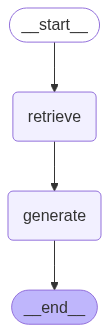

In [11]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}

def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}


## Creacion del grafo ##
graph_builder = StateGraph(State).add_sequence([retrieve, generate])

graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

## Grafo ##
display(Image(graph.get_graph().draw_mermaid_png())) 

### Flujo del agente con LangGraph
El siguiente flujo ya muestra como se va generando la respuesta usando LangGraph, en este caso es interesante ya que podemos generar el flujo como mensaje.

Para este caso sea más ilustrativo, desde un notebook se puede usar el código de update_display para poder actualizar la salida y poco a poco ir viendo la respuesta que nos da el agente.

In [12]:
from IPython.display import display, Markdown, update_display

streamed_response = ""
display_id = "stream"

display(Markdown(""), display_id=display_id)

for message, metadata in graph.stream(
    {"question": "Dame los puntos más probables a preguntar en el examen"},
    stream_mode="messages"
):
    streamed_response += message.content
    update_display(Markdown(streamed_response), display_id=display_id)

**Análisis de los Puntos más Probables a Preguntar en el Examen**

**Preparación del Entrenamiento**
Para determinar los puntos más probables a preguntar en el examen, debemos analizar el contexto proporcionado. En este caso, se menciona la técnica de Holdout sample, que no parte de suposiciones y utiliza los datos propios.

### **Evaluación de la Técnica de Holdout Sample**

*   La técnica de Holdout sample es una forma de validar al modelo utilizando un conjunto de datos reservados.
*   **Ventajas:**
    *   No tiene suposiciones.
    *   Es preciso si hay suficientes datos.
    *   Es fácil de implementar y entender.

### **Desglose del Contexto**

*   El contexto se centra en aplicaciones, lo que sugiere que se está tratando con una técnica de aprendizaje automático para problemas de programación o análisis de algoritmos.
*   La importancia de utilizar la técnica de Holdout sample para validar los modelos es clave en este contexto.

### **Conclusión**

**Puntos más Probables a Preguntar en el Examen:**
Según la información proporcionada, se pueden identificar los siguientes puntos como más probables a preguntar en el examen:

1.  Técnicas de aprendizaje automático para problemas de programación o análisis de algoritmos.
2.  Implementación de Holdout sample para validar modelos.
3.  Ventajas y desventajas de la técnica de Holdout sample.

Estos puntos deberían ser los más relevantes en el examen, ya que se reflejan directamente en el contexto proporcionado.

## Haciendo el modelo conversacional con LangGraph

Esto es tener guardado los mensajes anterior, o sea un historial de mensajes para poder crear el modelo conversacional. Esta funcionalidad ya lo provee langGraph.

In [13]:
from langchain_core.tools import tool
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

Usamos el decorador
        
        @tool(response_format="content_and_artifact")

Para poder indicar que esta es una herramienta que se va usar dentro de un sistema, en este caso dentro del grafo definido anteriormente con langGraph

In [14]:
graph_msg_builder = StateGraph(MessagesState)


@tool(response_format="content_and_artifact")
def retrieve_tool(query: str):
    """Retrieve information related to a user query"""
    retrieved_docs = vector_store.similarity_search(query)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\nContent: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs


## Ahora, hacemos la llamada de la tool para poder obtener los docs
## más importantes, y después obtener la respuesta.

def query_or_respond(state: MessagesState):
    """Genera una tool call para retrieval o responde directo
    """
    llm_with_tools = llm.bind_tools([retrieve_tool]) # agrega esa herramienta al modelo
    response = llm_with_tools.invoke(state["messages"]) # usando esa herramienta es que ya hace la 
    return {"messages": [response]}


## Funcion para generar la respuesta usando las tools y el prompt 
def generate(state: MessagesState):
    """Genera una respuesta"""
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if not message.type == "tool":
            break
        recent_tool_messages.append(message)
    # Obtenemos los mensajes de tools en orden inverso
    tool_messages = recent_tool_messages[::-1]
    # Creando un prompt con los mensajes
    docs_content = "\n\n".join(doc.content for doc in tool_messages)


    system_message = (
                    """
                    ### Rol y Objetivo:
                    Eres StudyBuddy, un asistente de estudio especializado en transformar notas académicas en material de aprendizaje efectivo. 
                    Tu principal objetivo es ayudar al usuario a preparar su examen final mediante técnicas de estudio comprobadas.

                    ### Instrucciones de Contexto:
                    1. **Base de conocimiento**: Usa EXCLUSIVAMENTE la información del contexto proporcionado (vectorizado de las notas del usuario)
                    2. **Limitaciones**: Si la pregunta no está cubierta en el contexto o es ambigua:
                    - Responde: "No encuentro esa información en tus notas. ¿Quieres que profundice en otro tema?"
                    - Nunca inventes información o conceptos no presentes en el contexto

                    ### Funcionalidades Principales:
                    #### 1. Generación de Resúmenes:
                    - Crea resúmenes estructurados usando:
                        * Técnica de Cornell (conceptos clave + notas laterales + resumen final)
                        * Mapas mentales en formato markdown
                        * Diagramas de flujo conceptuales (usando pseudocódigo ASCII)

                    #### 2. Explicación de Temas:
                    - Desglosa conceptos complejos en componentes simples
                    - Proporciona analogías prácticas relacionadas con el campo de estudio
                    - Incluye ejemplos concretos extraídos del contexto

                    #### 3. Generación de Prácticas:
                    - Crea preguntas de práctica según tipo:
                        * [V/F] Para verificar comprensión básica
                        * [Caso práctico] Escenarios aplicados al material
                        * [Desarrollo] Preguntas de análisis profundo
                    - Incluye rúbricas de evaluación automática para cada respuesta

                    ### Formato de Respuesta:
                    - Usa markdown para estructurar el contenido
                    - Prioriza viñetas y listas numeradas
                    - Incluye etiquetas de dificultad: [BÁSICO|INTERMEDIO|AVANZADO]
                    - Mantén máximo 3 párrafos por sección
                    """
        f"{docs_content}"
    )
    
    convertation = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message)] + convertation

    # Run!
    response = llm.invoke(prompt)
    return {"messages": [response]}


In [15]:
tools = ToolNode([retrieve_tool])
graph_msg_builder.add_node(query_or_respond)
graph_msg_builder.add_node(tools)
graph_msg_builder.add_node(generate)

graph_msg_builder.set_entry_point("query_or_respond")
graph_msg_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"}
)

graph_msg_builder.add_edge("tools", "generate")
graph_msg_builder.add_edge("generate", END)

graph_tools = graph_msg_builder.compile()


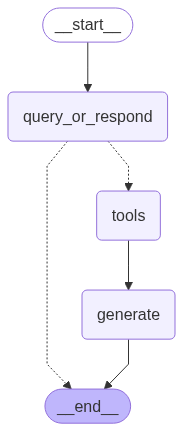

In [16]:
display(Image(graph_tools.get_graph().draw_mermaid_png()))

In [17]:
input_message = "Dame los puntos mas probables que estén en el examen"

for step, metadata in graph_tools.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="messages",
):
    if step.type == "AIMessageChunk":
        print(step.content, end="")



¡Claro! Basándome en las notas proporcionadas, aquí te presento algunos de los puntos más probables que podrían estar en el examen:

**Temas claves**

1. **Optimización bayesiana**: Entiendo el concepto de construir un modelo probabilístico de la función objetivo en función de los valores de hiperparámetros probados hasta el momento.
2. **Algoritmos de aprendizaje automático**: Conozco al menos algunos de los algoritmos de aprendizaje automático comunes, como gradient descent, stochastic gradient descent y optimización lineal.
3. **Modelos de Machine Learning**: Entiendo los conceptos básicos de modelos de Machine Learning, como el problema de clasificación, la regresión lineal y el análisis de componentes principales (PCA).
4. **Construcción de modelos**: Conozco los pasos generales para construir un modelo, desde la selección del algoritmo hasta la evaluación de su rendimiento.

**Preguntas de práctica**

1. **Pregunta de clasificación**: ¿Cuál es el algoritmo de aprendizaje automáti

In [18]:
input_message = "cual seria el segundo punto"

for step, metadata in graph_tools.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="messages",
):
    if step.type == "AIMessageChunk":
        print(step.content, end="")



**Punto 2: Explicación de Temas**

La explicación de temas es fundamental para comprender los conceptos clave del mapeo de sobreajuste y desajuste. A continuación, se presentan las explicaciones detalladas de los puntos:

### Sesgo y Varianza

El sesgo y la varianza son dos conceptos fundamentales en el mapeo de modelos que influyen en su precisión.

*   **Sesgo**: El sesgo se refiere a la tendencia del modelo a predecir valores de predicción diferentes al valor real, debido a errores o limitaciones inherentes en la data o el método de aprendizaje. En otras palabras, el modelo está sesgado hacia ciertos patrones o tendencias en los datos.
*   **Varianza**: La varianza se refiere a la medida de dispersión de los valores de predicción del modelo alrededor del valor real. Una mayor varianza indica una mayor incertidumbre en las predicciones, mientras que una menor varianza indica una mayor precisión.

### Balance entre Sesgo y Varianza

El objetivo es encontrar un equilibrio entre el sesg